In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [117]:
def regression_results(y_true, y_pred):
    #regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('explained variance :',round(explained_variance,4))
    print('mean squared log error :', round(mean_squared_log_error,4))
    print('r2 :',round(r2,4))
    print('MAE :',round(mean_absolute_error,4))
    print('MSE :',round(mse,4))
    print('RMSE :',round(np.sqrt(mse),4))

In [118]:
df = pd.read_csv('featured_data.csv')

In [119]:
df

,total,year,day,day_of_week,week_of_year,day^year,daily_avg,monthly_avg,shift_7
0,206.24000,2019,10,4,2,16.617236,218.783329,209.164267,45.37500
1,241.41700,2019,11,5,2,17.294467,210.604226,209.164267,221.35570
2,218.08950,2019,14,1,3,18.928349,211.253393,209.164267,254.63450
3,253.10338,2019,15,2,3,19.375847,214.363986,209.164267,208.07718
4,304.49430,2019,16,3,3,19.786819,225.923188,209.164267,226.09680
...,...,...,...,...,...,...,...,...,...
768,263.63500,2021,28,2,39,36.199845,214.363986,208.633194,234.90050
769,286.02800,2021,29,3,39,36.213588,225.923188,208.633194,242.91150
770,254.22700,2021,30,4,39,36.227271,218.783329,208.633194,251.38300
771,233.87700,2021,2,6,39,36.254463,111.336368,210.123357,253.07300


In [120]:
X = df.drop('total', axis=1)
y = df['total']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [122]:
X_test

,year,day,day_of_week,week_of_year,day^year,daily_avg,monthly_avg,shift_7
386,2020,27,3,22,32.204537,225.923188,204.152380,203.9964
210,2019,14,1,42,32.944989,211.253393,210.123357,262.4235
36,2019,27,3,9,26.704372,225.923188,211.288535,297.5039
379,2020,15,5,20,31.866093,210.604226,204.152380,246.6180
625,2021,26,5,12,31.371491,210.604226,218.417103,266.1076
...,...,...,...,...,...,...,...,...
64,2019,7,7,14,28.932877,147.891983,209.620139,258.1769
252,2019,3,2,49,33.474646,214.363986,145.575734,255.8080
672,2021,28,5,21,33.814764,210.604226,204.152380,274.8960
713,2021,22,4,29,35.093517,218.783329,181.955145,252.0495


In [8]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

In [125]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = model.predict(X_test)

In [14]:
regression_results(y_test, y_pred)

explained variance : 0.3269
mean squared log error : 1.5633
r2 : 0.3236
MAE : 124.2904
MSE : 29075.2666
RMSE : 170.5147


In [127]:
regression_results(y_test, y_pred)

explained variance : 0.3427
mean squared log error : 2.5668
r2 : 0.3418
MAE : 54.6175
MSE : 5517.4267
RMSE : 74.2794


In [128]:
df_1 = pd.read_csv('cleaned_data.csv')

In [159]:
df_1 = df_1[['order_load_year','order_load_week','order_size']].groupby(['order_load_year','order_load_week']).sum().reset_index()

In [157]:
df_1

,order_load_year,order_load_week,order_size,shift_7,shift_7_diff
2,2019,3,1296.78888,804.06150,-151.47768
3,2019,4,1360.04170,1296.78888,492.72738
4,2019,5,1189.00916,1360.04170,63.25282
5,2019,6,1450.58950,1189.00916,-171.03254
6,2019,7,967.74460,1450.58950,261.58034
...,...,...,...,...,...
139,2021,35,1123.94400,986.51650,97.08100
140,2021,36,907.99300,1123.94400,137.42750
141,2021,37,1135.16900,907.99300,-215.95100
142,2021,38,1199.21050,1135.16900,227.17600


In [133]:
df_1['shift_7'] = df_1['order_size'].shift(1)

In [134]:
df_1['shift_7_diff'] = df_1['shift_7'].diff()

In [135]:
df_1 = df_1.dropna()

In [136]:
corr = df_1.corr()

<AxesSubplot:>

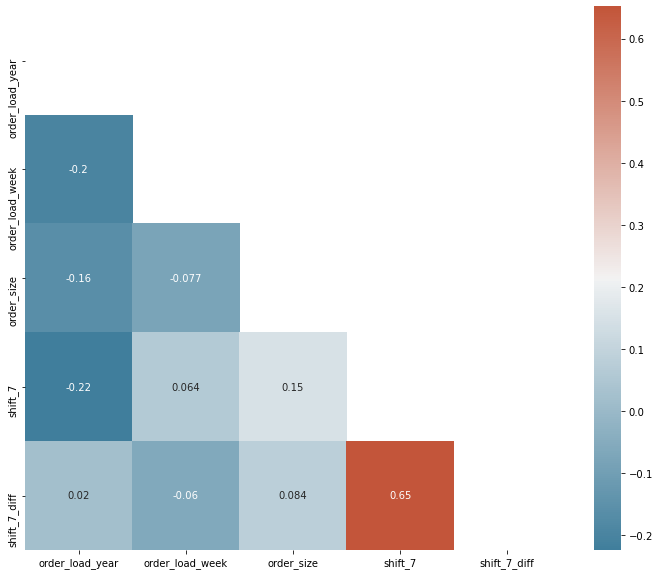

In [137]:
# create heatmap
f, ax = plt.subplots(figsize=(12, 10))

#masking top half
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [138]:
# import XGB model
import xgboost as xgb

In [139]:
model = xgb.XGBRegressor(n_estimators=500, 
                        learning_rate = 0.01)

In [140]:
X_1 = df_1.drop('order_size',axis=1)
y_1 = df_1['order_size']

In [141]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.3, random_state=123)

In [142]:
X_test1.shape

(43, 4)

In [179]:
model.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
y_preds = model.predict(X_test1)

In [181]:
y_preds

array([ 905.1037 , 1100.8892 , 1200.415  , 1201.2704 , 1000.1563 ,
       1103.4008 , 1040.5178 , 1091.0792 , 1076.6238 , 1055.7626 ,
        534.6896 , 1051.9884 , 1225.0798 , 1094.3416 ,  934.9824 ,
       1142.1528 , 1147.8529 ,  920.434  ,  989.27246,  879.452  ,
       1140.9967 , 1035.8562 , 1217.4584 , 1099.4316 , 1189.9806 ,
       1098.1508 , 1283.2991 , 1364.0784 ,  997.19403, 1249.2549 ,
       1194.6736 ,  942.2361 , 1160.0725 , 1026.0122 ,  980.9656 ,
       1119.242  , 1361.085  ,  968.75226, 1057.8376 ,  887.2443 ,
        941.26276, 1098.5824 ,  983.78156], dtype=float32)

In [182]:
regression_results(y_test1, y_preds)

explained variance : -0.1976
mean squared log error : 0.0934
r2 : -0.2207
MAE : 211.4032
MSE : 74102.887
RMSE : 272.2185


In [153]:
df_2 = pd.read_csv('cleaned_data.csv')

In [162]:
df_2 = df_2[['order_load_year','order_load_week','order_size','distance']].groupby(['order_load_year','order_load_week']).sum().reset_index()

In [163]:
df_2

,order_load_year,order_load_week,order_size,distance
0,2019,1,955.53918,139404
1,2019,2,804.06150,128820
2,2019,3,1296.78888,184058
3,2019,4,1360.04170,192137
4,2019,5,1189.00916,165412
...,...,...,...,...
139,2021,35,1123.94400,167195
140,2021,36,907.99300,131884
141,2021,37,1135.16900,165226
142,2021,38,1199.21050,175071


In [164]:
df_2['shift_7'] = df_2['order_size'].shift(1)

In [166]:
df_2['shift_7_diff'] = df_2['shift_7'].diff()

In [168]:
df_2 = df_2.dropna()

In [189]:
df_3 = df_2.drop(['shift_7', 'shift_7_diff'],axis=1)

In [169]:
X_2 = df_2.drop('order_size',axis=1)
y_2 = df_2['order_size']

In [170]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=123)

In [183]:
model.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
y_preds2 = model.predict(X_test2)

In [185]:
regression_results(y_test2, y_preds2)

explained variance : 0.916
mean squared log error : 0.0046
r2 : 0.8967
MAE : 52.4229
MSE : 6041.8168
RMSE : 77.7291


In [187]:
X_test2

,order_load_year,order_load_week,distance,shift_7,shift_7_diff
107,2021,3,161744,705.39900,-550.79950
129,2021,25,176248,1196.70800,354.07300
133,2021,29,136726,911.78000,-228.88474
47,2019,48,178851,1110.11080,-49.37800
33,2019,34,124486,657.28426,-440.01224
61,2020,10,184316,1309.84450,205.94450
121,2021,17,212124,1286.72800,274.41650
37,2019,38,181031,952.90480,-8.57180
6,2019,7,138810,1450.58950,261.58034
74,2020,23,195927,1281.42050,438.68250


In [190]:
df_3

,order_load_year,order_load_week,order_size,distance
2,2019,3,1296.78888,184058
3,2019,4,1360.04170,192137
4,2019,5,1189.00916,165412
5,2019,6,1450.58950,220943
6,2019,7,967.74460,138810
...,...,...,...,...
139,2021,35,1123.94400,167195
140,2021,36,907.99300,131884
141,2021,37,1135.16900,165226
142,2021,38,1199.21050,175071


In [191]:
X_3 = df_3.drop('order_size',axis=1)
y_3 = df_3['order_size']

In [192]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=123)

In [198]:
model3 = xgb.XGBRegressor(n_estimators=500, 
                        learning_rate = 0.01)

In [199]:
model3.fit(X_train3, y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
y_preds3 = model3.predict(X_test3)

In [201]:
regression_results(y_test3, y_preds3)

explained variance : 0.9166
mean squared log error : 0.0045
r2 : 0.8981
MAE : 51.6425
MSE : 5959.7327
RMSE : 77.1993


In [197]:
X_test3

,order_load_year,order_load_week,distance
107,2021,3,161744
129,2021,25,176248
133,2021,29,136726
47,2019,48,178851
33,2019,34,124486
61,2020,10,184316
121,2021,17,212124
37,2019,38,181031
6,2019,7,138810
74,2020,23,195927


In [202]:
df_4 = df_3.drop('distance',axis=1)

In [203]:
X_4 = df_4.drop('order_size',axis=1)
y_4 = df_4['order_size']

In [204]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size=0.2, random_state=123)

In [206]:
model4 = xgb.XGBRegressor(n_estimators=500, 
                        learning_rate = 0.01)

In [209]:
model4.fit(X_train4, y_train4)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
y_preds4 = model4.predict(X_test4)

In [211]:
regression_results(y_test4, y_preds4)

explained variance : -0.845
mean squared log error : 0.1324
r2 : -0.9254
MAE : 260.4996
MSE : 112644.198
RMSE : 335.6251


In [213]:
corr_2 = df_2.corr()

<AxesSubplot:>

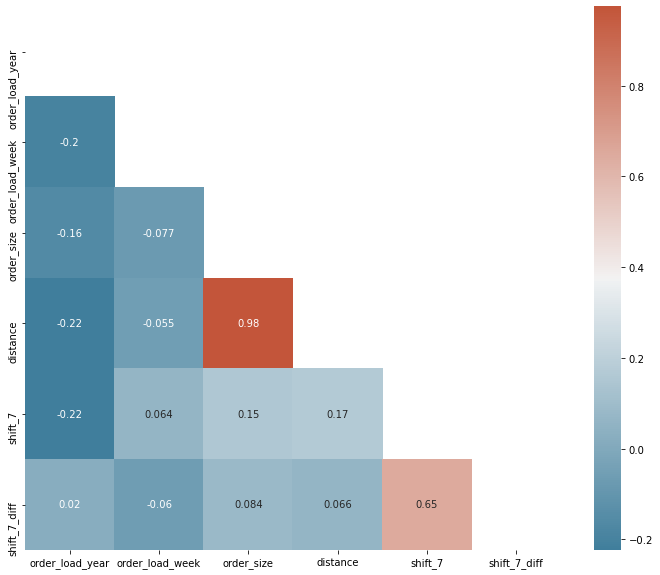

In [214]:
# create heatmap
f, ax = plt.subplots(figsize=(12, 10))

#masking top half
mask = np.triu(np.ones_like(corr_2, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create heatmap
sns.heatmap(corr_2, annot=True, mask = mask, cmap=cmap)